# Exploratory Factor Analysis (EFA) - Cars Dataset graph

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
#activation des tables interactifs
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [2]:
# Chargement des données
import pandas as pd
D = pd.read_excel("./data/Data_Methodes_Factorielles.xlsx",sheet_name="AUTOS_AFP",index_col=0)
D

CYL  PUISS  LONG  LARG  POIDS  VMAX   RND1   RND2   RND3  \
Modele                                                                       
Alfasud TI       1350     79   393   161    870   165  1.029  0.109  0.267   
Audi 100         1588     85   468   177   1110   160  0.379  0.367 -1.054   
Simca 1300       1294     68   424   168   1050   152 -0.346  0.737 -0.056   
Citroen GS Club  1222     59   412   161    930   151  0.849  0.494 -0.320   
Fiat 132         1585     98   439   164   1105   165 -1.425 -0.210  0.535   
Lancia Beta      1297     82   429   169   1080   160  0.890  0.071 -1.308   
Peugeot 504      1796     79   449   169   1160   154 -0.860 -0.001 -0.315   
Renault 16 TL    1565     55   424   163   1010   140  2.379 -1.367 -0.633   
Renault 30       2664    128   452   173   1320   180 -0.578  0.705 -1.304   
Toyota Corolla   1166     55   399   157    815   140  0.381  0.330  0.121   
Alfetta 1.66     1570    109   428   162   1060   175  0.204  0.287 -2.117   
Princess 1800    1798     82   445   172   1160   158  0.216  0.549 -0.619   
Datsun 200L      1998    115   469   169   1370   160  0.603  0.914  1.403   
Taunus 2000      1993     98   438   170   1080   167 -0.326  0.857 -0.565   
Rancho           1442     80   431   166   1129   144 -0.787  0.948 -1.389   
Mazda 9295       1769     83   440   165   1095   165 -0.931  1.222 -0.133   
Opel Rekord      1979    100   459   173   1120   173  0.984  0.831 -0.138   
Lada 1300        1294     68   404   161    955   140  0.986  0.791 -0.100   

                  RND4   RND5   RND6  
Modele                                
Alfasud TI      -0.949  0.053 -1.144  
Audi 100         0.106  1.316  1.632  
Simca 1300      -0.430  0.274  1.044  
Citroen GS Club  0.729  0.637  0.793  
Fiat 132        -0.200 -1.983  0.832  
Lancia Beta     -0.971 -0.131 -1.134  
Peugeot 504     -1.329 -0.605  1.299  
Renault 16 TL   -1.448  0.609 -0.175  
Renault 30       2.124 -1.132 -2.091  
Toyota Corolla  -1.285  0.570 -1.628  
Alfetta 1.66    -1.675  0.111  2.773  
Princess 1800   -0.096 -1.632 -0.066  
Datsun 200L     -0.371 -1.892  0.681  
Taunus 2000      1.455  0.370 -0.656  
Rancho          -0.377 -0.139 -0.721  
Mazda 9295      -1.090 -1.201  0.187  
Opel Rekord      0.545 -1.730  1.459  
Lada 1300        0.037  0.221  0.764

In [3]:
# Instanciation
from scientisttools import EFA
res_efa = EFA(standardize=True,n_components=None)
res_efa.fit(D)

EFA()

## Eigenvalues

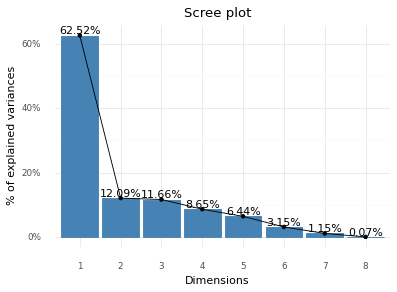

In [4]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_efa,add_labels=True)
print(p)

## Individuals

### Color by RGB color

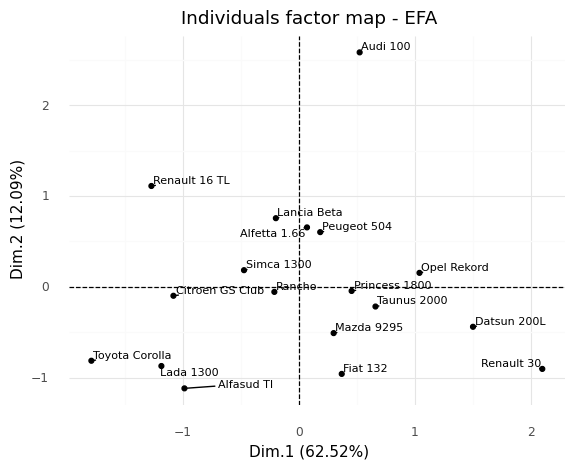

In [5]:
from scientisttools import fviz_efa_ind
p = fviz_efa_ind(res_efa,repel=True)
print(p)

### Color by quantitatives color

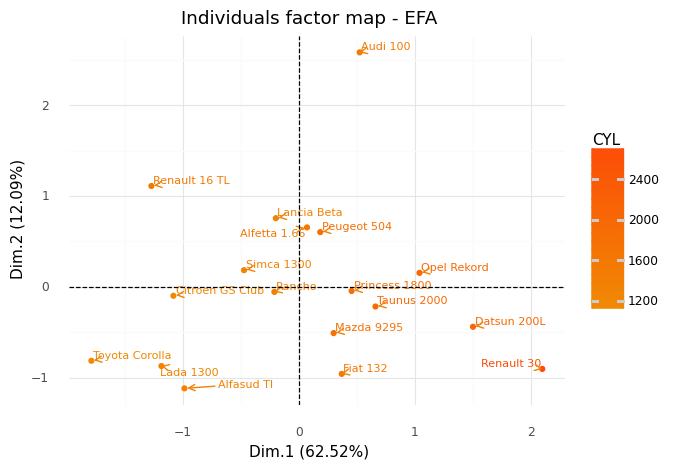

In [6]:
p = fviz_efa_ind(res_efa,color="CYL",repel=True)
print(p)

### Color by numpy array

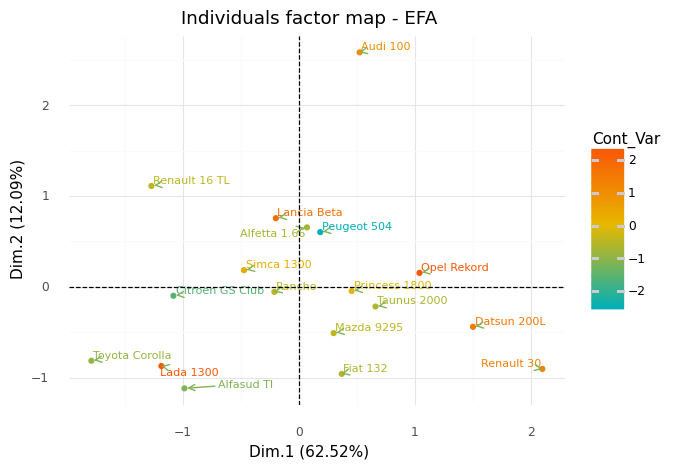

In [7]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_efa.call_.X.shape[0])
p = fviz_efa_ind(res_efa,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

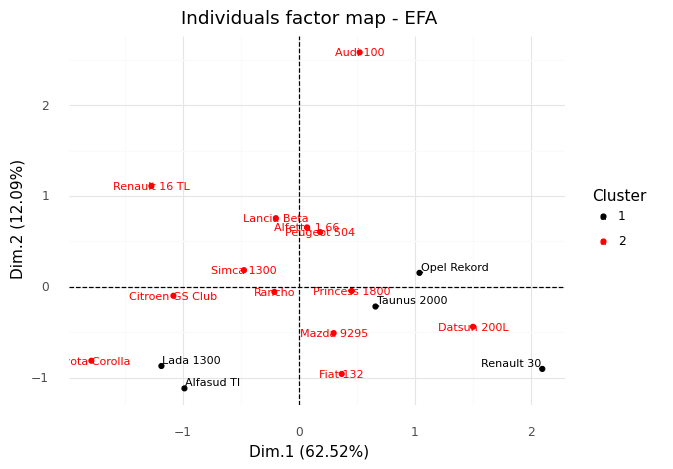

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=np.random.seed(123), n_init="auto").fit(res_efa.ind_.coord)
p = fviz_efa_ind(res_efa,color=kmeans,repel=True)
print(p)

## Variables

### Color bu RGB color

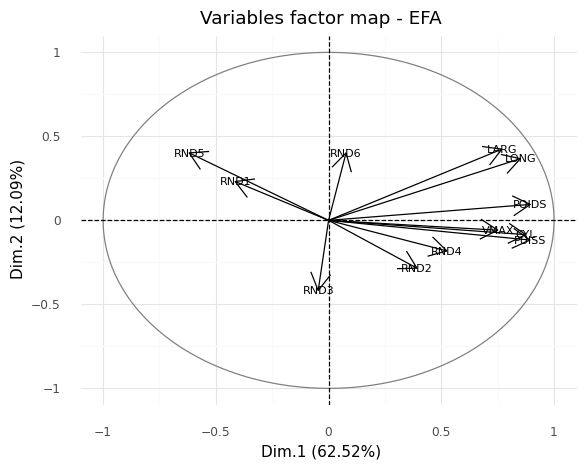

In [9]:
from scientisttools import fviz_efa_var
p = fviz_efa_var(res_efa)
print(p)

### Color by contrib

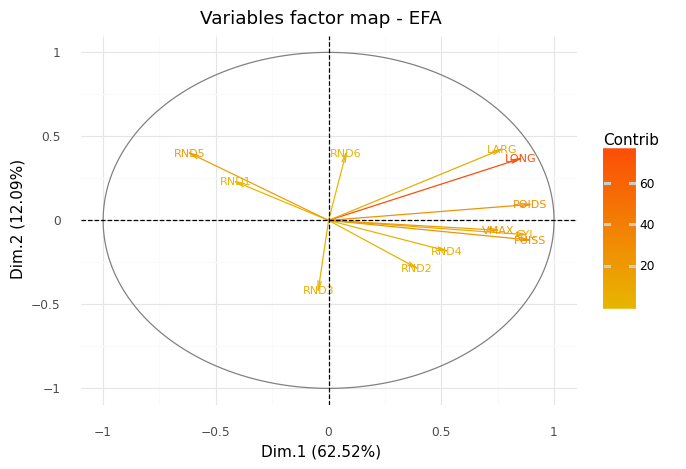

In [10]:
p = fviz_efa_var(res_efa,color="contrib")
print(p)

### Color by numy array

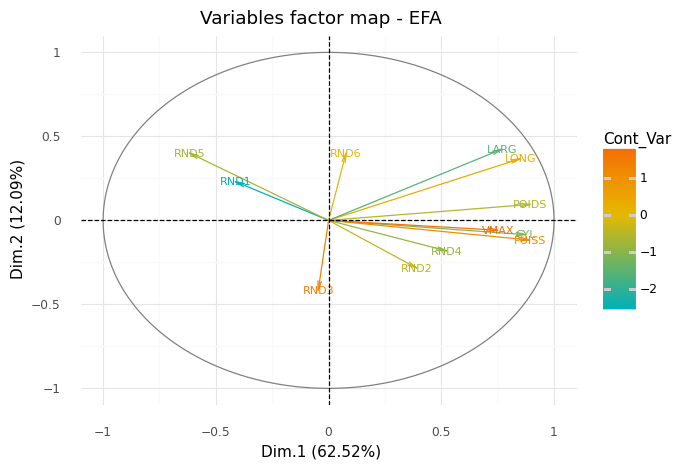

In [11]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_efa.call_.X.shape[1])
p = fviz_efa_var(res_efa,color=color_numpy)
print(p)

### Color by kmeans

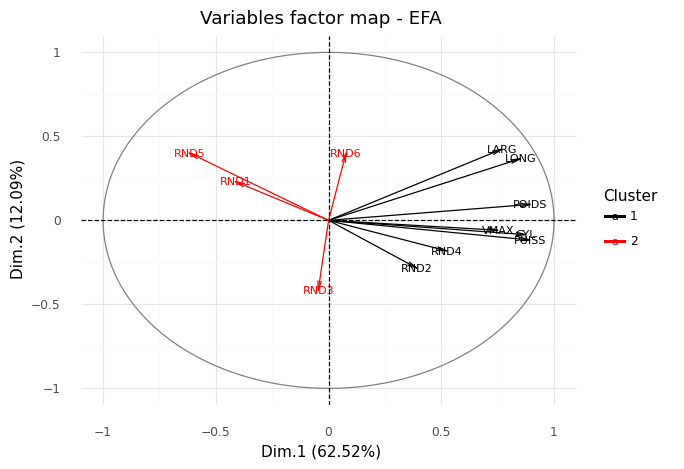

In [12]:
kmeans = KMeans(n_clusters=2, random_state=np.random.seed(123), n_init="auto").fit(res_efa.var_.coord)
p = fviz_efa_var(res_efa,color=kmeans)
print(p)

### Set limit

#### limit ccontrib

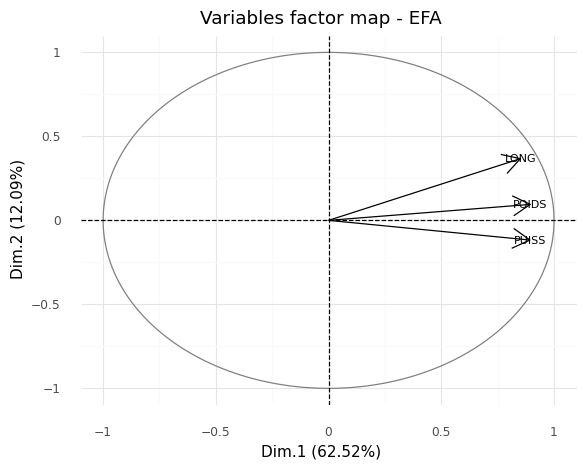

In [13]:
p = fviz_efa_var(res_efa,lim_contrib=20)
print(p)

# Plot contribution

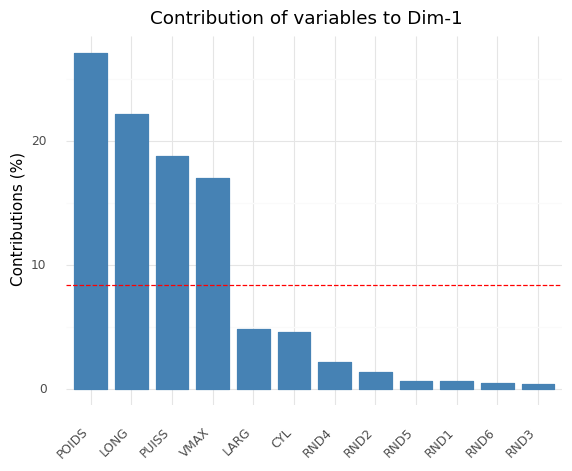

In [14]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_efa,choice="var")
print(p)

### Corrcircle

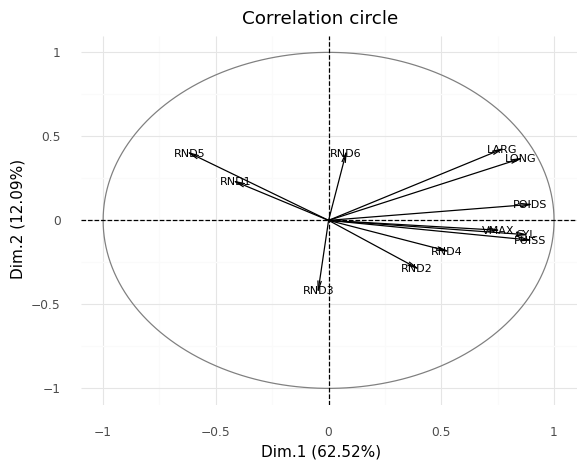

In [15]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_efa)
print(p)

## Biplot

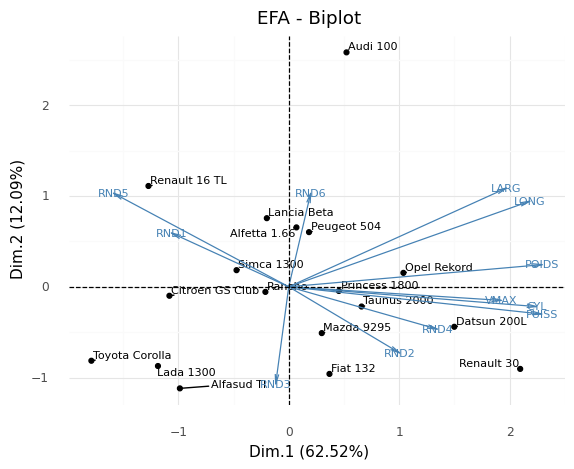

In [16]:
from scientisttools import fviz_efa_biplot
p = fviz_efa_biplot(res_efa)
print(p)

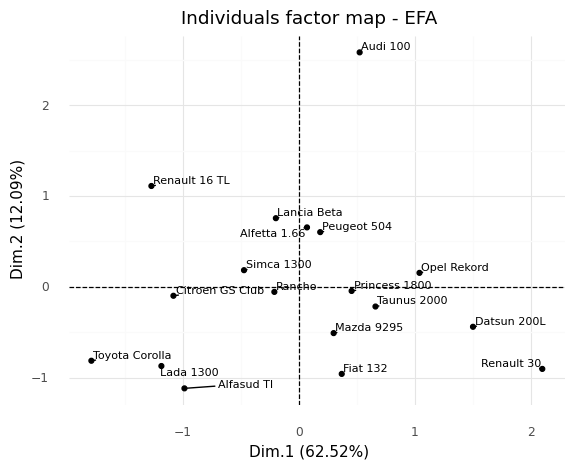

In [17]:
from scientisttools import fviz_efa
p = fviz_efa(res_efa,choice="ind",repel=True)
print(p)

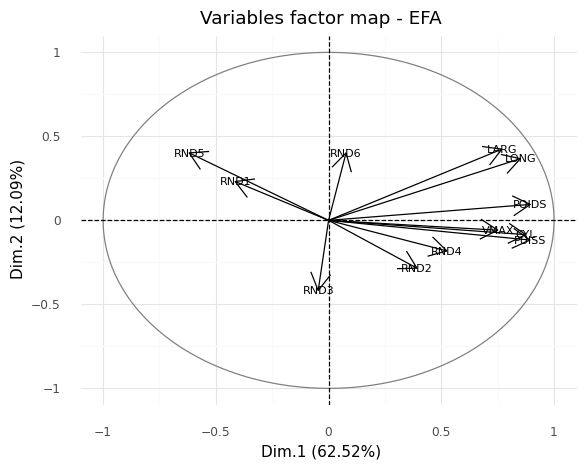

In [18]:
p = fviz_efa(res_efa,choice="var")
print(p)

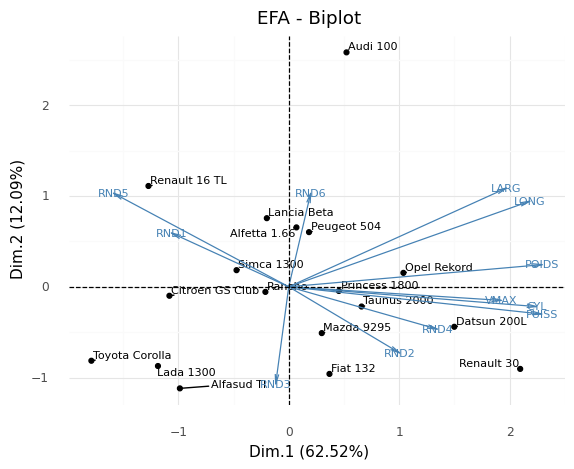

In [19]:
p = fviz_efa(res_efa,choice="biplot")
print(p)

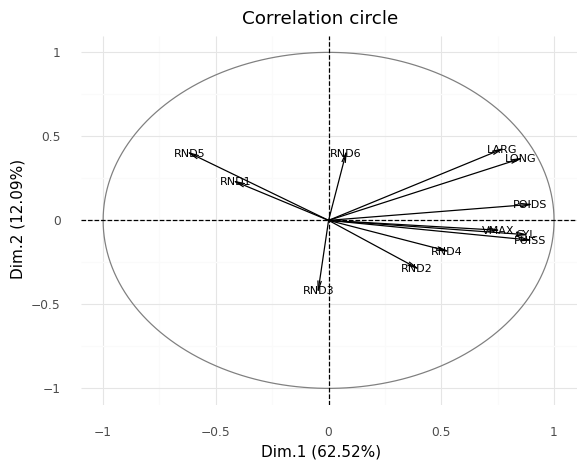

In [20]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_efa)
print(p)